# Heart Disease Prediction with BRFSS Survey

*Author 1*: Jiaao Shen, js1025

*Author 2*: Linhui Fu, lf189

*Author 3*: Jingjing Wang, jw706

*Author 4*: Congjun Huang, ch496

## 1. Introduction and Motivation

The most horrible Cardiovascular Disease (CVD), heart disease, is now one of the leading causes of death around the world. There are many risk factors for heart disease, such as high blood pressure, high cholesterol, smoking, high BMI, lack of exercise, etc. Among those, the first three are the key risk factors; and about half of all Americans have at least one of them according to the Centers for Disease Control and Prevention (CDC). 

This project takes the dataset from CDC to build machine learning models which could predict whether a patient is likely to have heart disease. The data are taken from the Behavioral Risk Factor Surveillance System (BRFSS) which annually organizes surveys regarding of basic health status of U.S. residents. A direct quote from the CDC is: "Established in 1984 with 15 states, BRFSS now collects data in all 50 states as well as the District of Columbia and three U.S. territories. BRFSS completes more than 400,000 adult interviews each year, making it the largest continuously conducted health survey system in the world.”

Here our team took the newest data, which are from 2020, to analyze and learn from. Specifically, we constructed five classification machine learning models including Random Forest, Gradient Boosting, Bagging, Ada Boosting and Decision Tree techniques. Then we tuned hyperparameters, selected best model, evaluated its performance and conducted feature importance analysis. The findings of the project could not only serve as a method to predict the existence of a heart disease, but also educate doctors, nurses, researchers and potential patients to focus more on certain factors and take precautions in advance.  

Data Resource: https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease

## 2. Preparation

Below we imported all the packages needed for the project.

In [1]:
# import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import palettable
import warnings
warnings.filterwarnings('ignore')
import pickle

import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier 

from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import confusion_matrix

## 3. Exploratory Data Analysis (EDA) and Visualization

### 3.1 Feature Explaination 

In [2]:
# read data
df = pd.read_csv('heart_2020_cleaned.csv')
df.head(5) 

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


Note that the original data format is a survey, therefore most of the column variables have boolean responses. Here are detailed explainations for the features:
1. **HeartDisease:** Whether the respondent has reported having coronary heart disease (CHD)/myocardial infarction (MI)
2. **BMI:** Body Mass Index
3. **Smoking:** Whether the respondent has smoked more than 100 cigarettes so far
4. **AlcoholDrinking:** Whether the male respondent has 14 drinks per week/Whether the female respondent has 7 drinks per week
5. **Stroke:** Whether the respondent have ever had a stroke
6. **PhysicalHealth:** Number of days that’s considered ‘not having good physical health’ by the respondent during the past 30 days
7. **MentalHealth:** Number of days that’s considered ‘not having good mental health’ by the respondent during the past 30 days
8. **DiffWalking:** Whether the respondent has serious difficulty walking or climbing stairs
9. **Sex:** Gender of the respondent
10. **AgeCategory:** The respondent should choose from ‘18-24’,  ‘25-29’, ‘30-34’, ‘35-39’, ‘40-44’, ‘45-49’, ‘50-54’, ‘55-59’, ‘60-64’, ‘65-69’, ‘70-74’, ‘75-79’, ‘80 or older’
11. **Race:** The respondent should choose from 'White', 'Black', 'Asian', 'American Indian/Alaskan Native', ‘Hispanic’, 'Other'
12. **Diabetic:** The respondent should choose from ‘Yes', ‘No'', 'No, borderline diabetes', 'Yes (during pregnancy)’
13. **PhysicalActivity:** Whether the respondent did any physical activity or exercise during the past 30 days other than his or her regular jobs
14. **GenHealth:** The respondent should evaluate his or her own health and choose from ‘Poor', ‘Fair', ‘Good', 'Very good’, ‘Excellent'
15. **SleepTime:** Number of hours that the respondent gets in a 24-hour period on average
16. **Asthma:** Whether the respondent had asthma
17. **KidneyDisease:** Whether the respondent have had kidney disease except kidney stones, bladder infection, or incontinence
18. **SkinCancer:** Whether the respondent have had skin cancer

Basically there are two types of features, numerical and categorical. More specifically, BMI is a continuous numerical feature; PhysicalHealth, MentalHealth, and SleepTime are discrete numerical features. Likewise, HeartDisease, Sex, Smoking, Stroke, Asthma, AlcoholDrinking, KidneyDisease, SkinCancer, PhysicalActivity, and DiffWalking are binary categorical features; AgeCategory and GenHealth are ordinal categorical features; Race and Diabetic are nominal categorical features.

### 3.2 Exploratory Data Analysis (EDA) ###

#### 3.2.1 Dependent Variable ####

From the original dataset with 319,795 records, the number of respondents with heart disease is 27,273, while that of respondents without heart disease is 292,522. Respondents with heart disease account for about 8% in the overall.

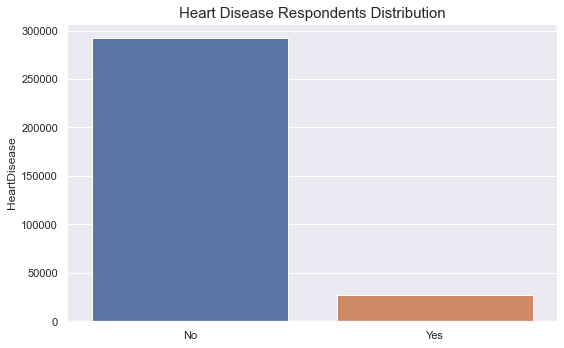

In [3]:
# create barchart for dependent variable
plt.figure(figsize=(8,5))
sns.barplot(x=df.HeartDisease.unique(), y=df.HeartDisease.value_counts(), data=df)
plt.title('Heart Disease Respondents Distribution', fontsize=15)
plt.tight_layout()
plt.show()

From the observation above, we found that the distribution of dependent variable is highly imbalanced. The data discrimination may cause potential problems such as biased prediction which leads to a high accuracy but a relatively low AUC. Thus, for the purpose of building better models, we undersampled the data points for people who do not have a heart disease.

In [4]:
# undersample data points
df_yes = df[df['HeartDisease'] == 'Yes']
df_no = df[df['HeartDisease'] == 'No']
count_no, count_yes = df['HeartDisease'].value_counts()
df_no_under = df_no.sample(count_yes)
df_under = pd.concat([df_no_under, df_yes], axis=0)
df = df_under

After undersampling, we managed to get a balanced dataset. In the adjusted dataset with 54,546 records, the number of respondents with or without heart disease is both 27,373. Respondents with heart disease account for 50% in the overall.

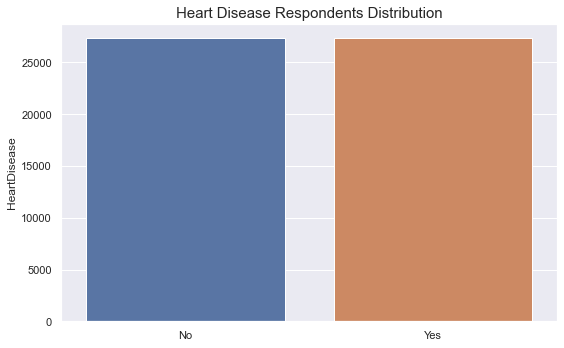

In [5]:
# create barchart for adjusted dependent variable
plt.figure(figsize=(8,5))
sns.barplot(x=df.HeartDisease.unique(), y=df.HeartDisease.value_counts(), data=df)
plt.xticks([0,1], labels=['No','Yes'])
plt.title('Heart Disease Respondents Distribution', fontsize=15)
plt.tight_layout()
plt.show()

#### 3.2.2 Numerical Features

For numerical features, the boxplots are used for exploration. It is easy to see that the distributions of physical health between adults with and without heart disease are dramatically different, whereas the distribution differences in BMI, sleep time and mental health are subtle. Therefore, further work are needed in terms of evaluating the relationship of heart disease and these numerical features.

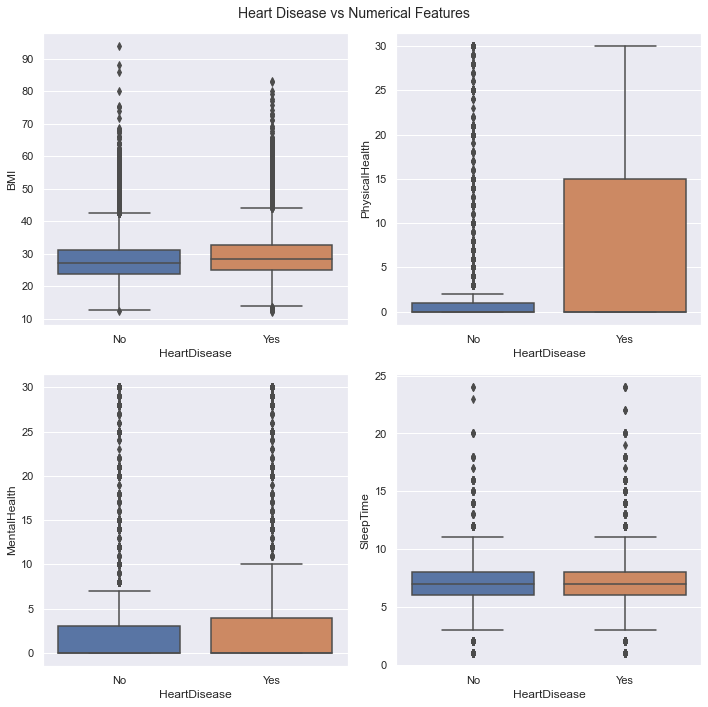

In [6]:
# create boxplots for heart disease and numerical features
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle('Heart Disease vs Numerical Features', fontsize=14)
sns.boxplot(ax=axes[0, 0], data=df, x='HeartDisease', y='BMI')
sns.boxplot(ax=axes[0, 1], data=df, x='HeartDisease', y='PhysicalHealth')
sns.boxplot(ax=axes[1, 0], data=df, x='HeartDisease', y='MentalHealth')
sns.boxplot(ax=axes[1, 1], data=df, x='HeartDisease', y='SleepTime')
plt.tight_layout()
plt.show()

From the correlation matrix, we can see that there are no apparent correlations among numerical features, which indicates that changes in one numerical feature would not have significant effects on one another. 

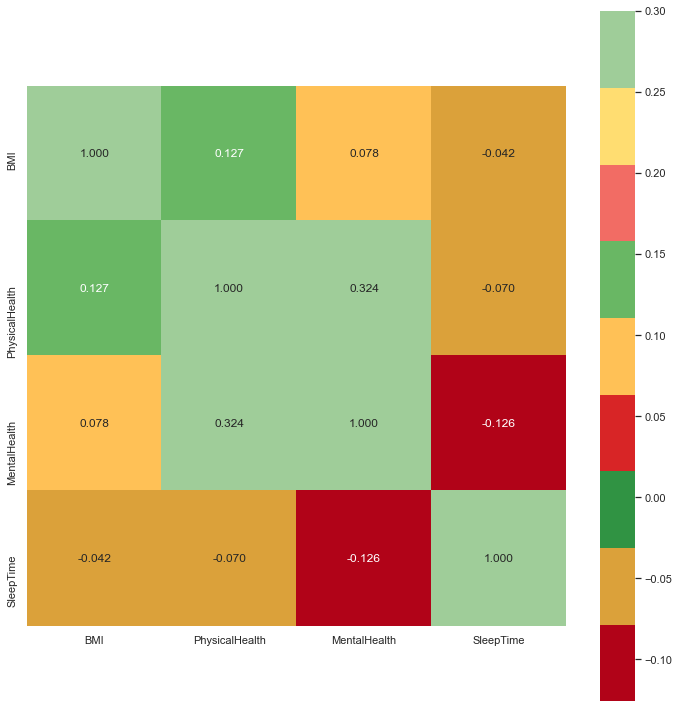

In [7]:
# draw a correlation heatmap of numerical features
corr = df.corr()
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, vmax=0.3, annot=True, fmt='.3f', square=True, cmap=palettable.tableau.TrafficLight_9.mpl_colors)
plt.tight_layout()
plt.show()

#### 3.2.3 Categorical Features ####

In order to evaluate the relationship of heart disease and categorical features, here we used the correlation analysis. We mainly utilized piecharts which could convey information needed. Below we created a function to draw piecharts of heart disease and categorical features.

In [8]:
# create a function to draw piecharts of heart disease and categorical features
def draw_pie(c, f, t, n):
    fig, axes = plt.subplots(1, 2, figsize=(n,n))
    y = df[df["HeartDisease"]=='Yes'][f].value_counts()
    n = df[df["HeartDisease"]=='No'][f].value_counts()
    y.plot.pie(autopct='%.1f%%', ax=axes[0], colors=[c[i] for i in y.keys()])                                                                     
    n.plot.pie(autopct='%.1f%%', ax=axes[1], colors=[c[i] for i in n.keys()])
    axes[0].set_title(t+'With heart disease', fontsize=13)
    axes[1].set_title(t+'Without heart disease', fontsize=13)
    plt.tight_layout()
    plt.show()

First, we looked into ordinal categorical features: AgeCategory and GenHealth. The strong positive correlation between age-increasing and heart disease is easy to spot. Furthremore, those who have heart disease tend to rate themselves as unhealthier.

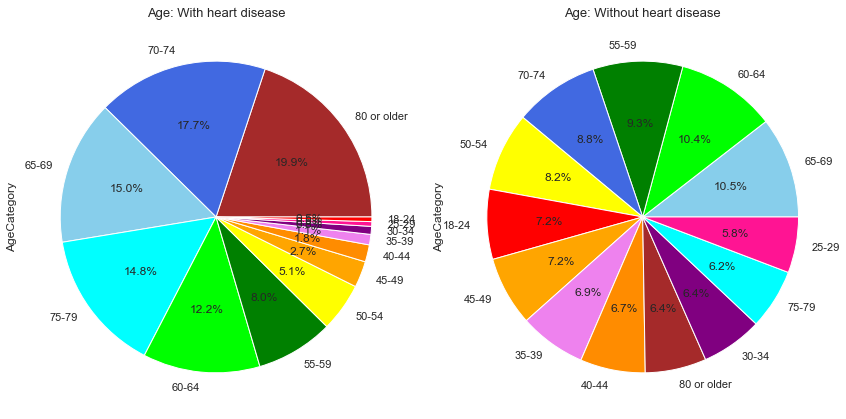

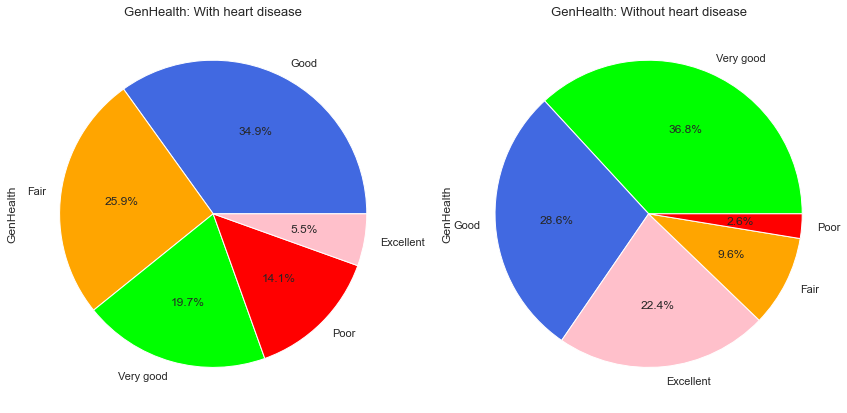

In [9]:
# draw piecharts of heart disease and ordinal categorical features
c_age = {'18-24':'red','25-29':'deeppink','30-34':'purple','35-39':'violet','40-44':'darkorange', 
         '45-49':'orange','50-54':'yellow','55-59':'green','60-64':'lime','65-69':'skyblue', 
         '70-74':'royalblue','75-79':'cyan','80 or older':'brown'}
c_gen = {'Poor':'red','Fair':'orange','Good':'royalblue','Very good':'lime','Excellent':'pink'}
draw_pie(c_age, 'AgeCategory', 'Age: ', 12)
draw_pie(c_gen, 'GenHealth', 'GenHealth: ', 12)

Second, as for nominal categorical features, we might be able to conclude that Asian, Black and Hispanic respondents have a lower probability of getting heart disease than other races. However, further analysis is necessary to confirm this statement. In addition, sample populations with diabetes are much more likely to have heart disease than those without. 

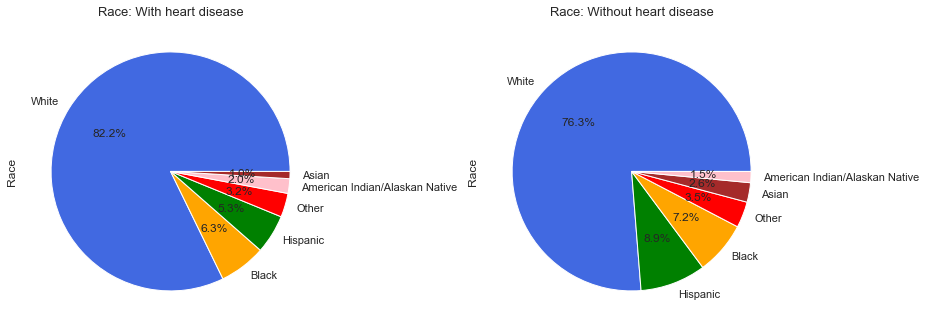

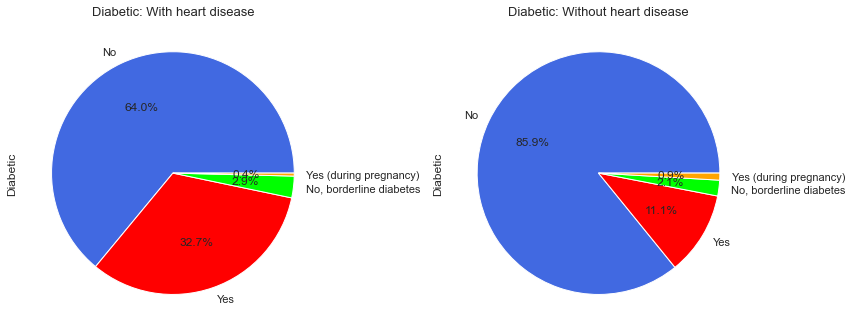

In [10]:
# draw piecharts of heart disease and nominal categorical features
c_race = {'White':'royalblue', 'Black':'orange', 'Asian':'brown', 'American Indian/Alaskan Native':'pink',
          'Other':'red', 'Hispanic':'green'}
c_dia = {'Yes':'red', 'No':'royalblue', 'No, borderline diabetes':'lime', 'Yes (during pregnancy)':'orange'}
draw_pie(c_race, 'Race', 'Race: ', 13)
draw_pie(c_dia, 'Diabetic', 'Diabetic: ', 12)

Third, for binary categorical features, piecharts are also used for evaluation. After grouping by each feature, from an overall perspective, we could see that the proportion of men having heart disease is significantly larger than women by 18%. Also, among the sample population with heart disease, the percentage of smokers is higher than non-smokers by 17.2%. 

However, when it comes to alcohol drinking, the difference between sample population with and without heart disease is little. But then again, people with stroke experiences are much more likely to have heart disease rather than people who do not, and the difference in proportion is 13.3%. Like alcohol drinking, asthma also has little to do with the heart disease distribution, since the difference is only 4.9%. Nevertheless, having serious difficulty walking or climbing stairs could be one of the key features of having heart disease, and the between-group difference is as high as 24.9%. 

Finally, the proportions of sample populations with and without heart disease are noticeably different in physical activity,  kidney disease as well as skin cancer; and the differences are 14.7%, 10.0% and 9.7% respectively. 

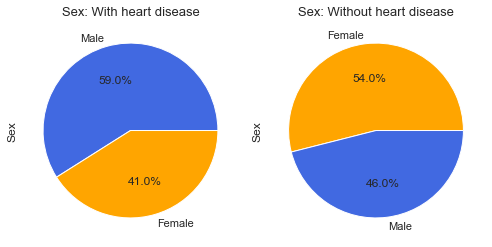

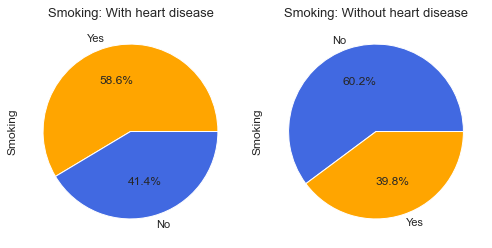

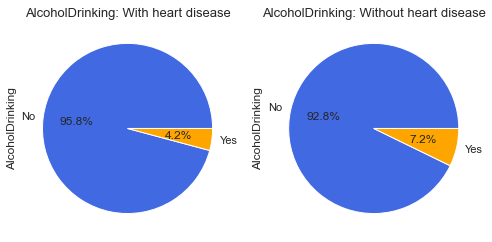

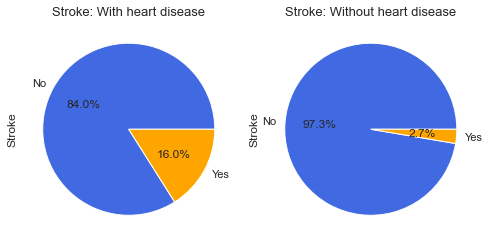

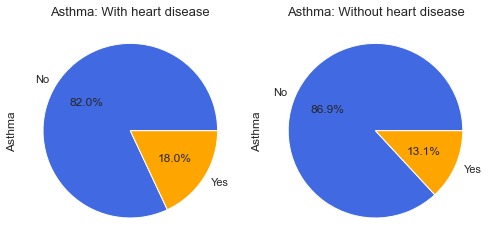

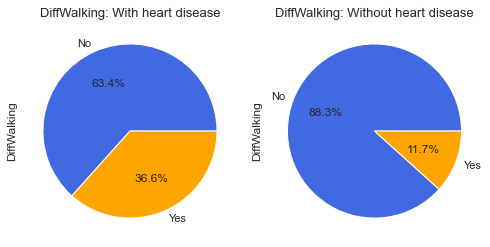

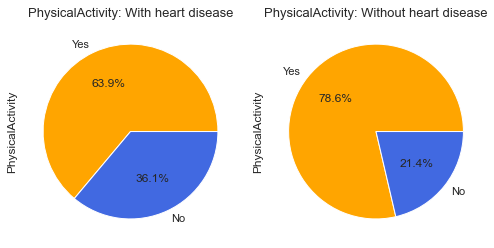

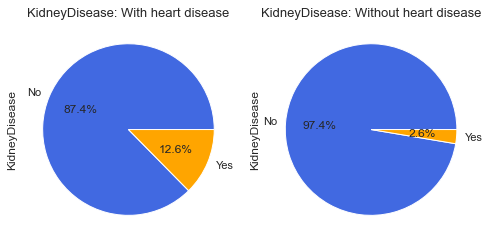

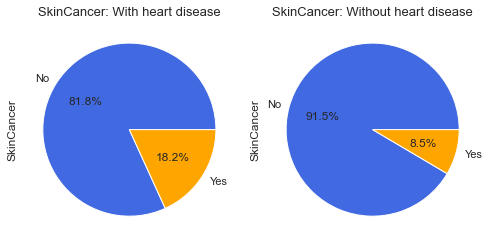

In [11]:
# create piecharts for heart disease and binary categorical features
c_sex = {'Male':'royalblue','Female':'orange'}
c_bi = {'Yes':'orange','No':'royalblue'}
bi = ['Smoking',
      'AlcoholDrinking',
      'Stroke',
      'Asthma', 
      'DiffWalking',
      'PhysicalActivity',
      'KidneyDisease',
      'SkinCancer']
draw_pie(c_sex, 'Sex','Sex: ', 7)
for i in bi:
    draw_pie(c_bi, i, i+': ', 7)

## 4. Model Training and Selection

### 4.1 Feature Engineering and Preprocessing

The data should be transformed based on the feature types. First, dependent variable HeartDisease was transformed with value 0 meaning negative and 1 meaning positive. Second, for categorical features, binary encoding was used for features including Smoking, AlcoholDrinking, Stroke, DiffWalking, Sex, Diabetic, Physical Activity, Asthma, KidneyDisease and SkinCancer; ordinal encoding was used for features AgeCategory and GenHealth; one hot encoding was used for features Race and Diabetic. Third, we split the dataset into training (70%) and testing (30%) for further machine learning model building, selection and application. Eventually, the numerical data entries were normalized using the package ‘StandardScaler’ from sklearn and we ensured that normalization of test set utilized all the statistical characteristics from the training set. 

In [12]:
# make a copy
copy = df

In [13]:
# transform dependent variable
copy['HeartDisease'] = copy['HeartDisease'].replace({'Yes':1,'No':0})

In [14]:
# transform binary categorical features
for val in bi:
    copy[val] = copy[val].replace({'Yes':1,'No':0})

In [15]:
# transform ordinal categorical features
age_encoder = ce.OrdinalEncoder(cols=['AgeCategory'],
                               return_df=True,
                               mapping=[{'col':'AgeCategory',
                                         'mapping':{'18-24':0,'25-29':1,
                                                    '30-34':2,'35-39':3,
                                                    '40-44':4,'45-49':5,
                                                    '50-54':6,'55-59':7,
                                                    '60-64':8,'65-69':9,
                                                    '70-74':10,'75-79':11,
                                                    '80 or older':12}}])
health_encoder = ce.OrdinalEncoder(cols=['GenHealth'], 
                                   return_df=True,
                                    mapping=[{'col':'GenHealth',
                                            'mapping':{'Poor':0,'Fair':1,
                                                       'Good':2,'Very good':3,
                                                       'Excellent':4}}])
copy = age_encoder.fit_transform(copy)
copy = health_encoder.fit_transform(copy)

In [16]:
# tranform nominal categorical features
copy = pd.get_dummies(copy)

In [17]:
# split into training and test set
X_train, X_test, y_train, y_test = train_test_split(copy.drop('HeartDisease', axis=1), copy.HeartDisease, 
                                                    test_size=0.3, random_state=123)

In [18]:
# observe training and test set size
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(38322, 26)
(16424, 26)
(38322,)
(16424,)


In [19]:
# transform numerical features in training set
ss = StandardScaler()
for cols in ['BMI','PhysicalHealth','MentalHealth','SleepTime']:
    X_train[cols] = ss.fit_transform(X_train[[cols]])
    X_test[cols] = ss.transform(X_test[[cols]])

### 4.2 Hyperparameter Tuning 

We selected 5 models including: Random Forest, Gradient Boosting, Bagging with XGBoost, Bagging with Decision Tree and Adaptive Boosting with Decision Tree. Then we utilized grid search with `StratifiedKFold` cross validation to tune model and find the best hyperparameters. We recorded best hyperparameters and the corresponding score (AUC of the ROC curve) for each model type to compare in the next model selection process.

#### Model 1: Random Forest

First, we used Random Forest. This is a tree-based ensemble model, and could avoid the results that have low bias but high variance. However, Random Forest requires a large number of predictors to choose from at each split, and also it would incur heavy computation. The best Random Forest model is `RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=90)` and the corresponding AUC is 0.839.

In [20]:
# perform grid search with Random Forest
pg_rf = {'n_estimators': [50,60,70,80,90],
         'criterion': ['gini','entropy'],
         'max_depth':[10,20,30,40,50]}
model_rf = GridSearchCV(
     RandomForestClassifier(), 
     pg_rf, 
     cv=StratifiedKFold(3, shuffle=True, random_state=1234), 
     scoring='roc_auc', 
     verbose=5,
     n_jobs=-1).fit(
     X_train,y_train)  

Fitting 3 folds for each of 50 candidates, totalling 150 fits


In [21]:
# record best estimator and best score
print(model_rf.best_estimator_)
print(model_rf.best_score_)

RandomForestClassifier(max_depth=10, n_estimators=90)
0.83886692693183


#### Model 2: Gradient Boosting

Second, we used Gradient Boosting. This is a very robust algorithm combining Gradient descent and Boosting. The word ‘gradient’ implies that we can have two or more derivatives of the same function. Gradient Boosting has three main components: additive model, loss function and a weak learner. The best Gradient Boosting model is `GradientBoostingClassifier(max_depth=3)` and the corresponding AUC is 0.841.

In [22]:
# perform grid search with Gradient Boosting
pg_gb = {'max_depth':[2,3,4,5,6]}
model_gb = GridSearchCV(
         GradientBoostingClassifier(n_estimators=100), 
         pg_gb, 
         cv=StratifiedKFold(3, shuffle=True, random_state=1234), 
         scoring='roc_auc', 
         verbose=5,
         n_jobs=-1).fit(
         X_train,y_train) 

Fitting 3 folds for each of 5 candidates, totalling 15 fits


In [23]:
# record best estimator and best score
print(model_gb.best_estimator_)
print(model_gb.best_params_)
print(model_gb.best_score_)

GradientBoostingClassifier()
{'max_depth': 3}
0.8414393158037973


#### Model 3: Bagging with XGBoost

Next, we used Bagging method with the XGBoost classifier as the base estimator. This is an alternative of Random Forest with a lighter computational pressure. A bagged tree is constructed in a similar fashion to Random Forest. The primary difference is that in a bagged model, all attributes are evaluated at each split in each tree. The best Bagging with XGBoost model is `BaggingClassifier(base_estimator=XGBClassifier(), max_samples=50, n_estimators=5)` and the corresponding AUC is 0.802.

In [24]:
# perform grid search with Bagging with XGBoost
pg_bag = {'n_estimators':[5,6,7],
          'max_samples':[30,40,50]}
model_bag = GridSearchCV(
     BaggingClassifier(base_estimator=XGBClassifier(eval_metric='mlogloss'),random_state=12), 
     pg_bag, 
     cv=StratifiedKFold(3, shuffle=True, random_state=23), 
     scoring='roc_auc', 
     verbose=5,
     n_jobs=-1).fit(
     X_train,y_train) 

Fitting 3 folds for each of 9 candidates, totalling 27 fits


In [25]:
# record best estimator and best score
print(model_bag.best_estimator_)
print(model_bag.best_score_)

BaggingClassifier(base_estimator=XGBClassifier(base_score=None, booster=None,
                                               colsample_bylevel=None,
                                               colsample_bynode=None,
                                               colsample_bytree=None,
                                               enable_categorical=False,
                                               eval_metric='mlogloss',
                                               gamma=None, gpu_id=None,
                                               importance_type=None,
                                               interaction_constraints=None,
                                               learning_rate=None,
                                               max_delta_step=None,
                                               max_depth=None,
                                               min_child_weight=None,
                                               missing=nan,
                     

#### Model 4: Bagging with Decision Tree

After that, we utilized the Bagging classifier with classic Decision Tree model as the base estimator. This is a reasonable choice for our binary classification problem since the interpretation of a tree model is relatively transparent and straightforward.
The best Bagging with Decision Tree model is `BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5), max_samples=40, n_estimators=7)` and the corresponding AUC is 0.782.

In [26]:
# perform grid search with Bagging with Decision Tree
pg_dt = {'n_estimators':[5,6,7],
         'max_samples':[30,40,50]}
model_dt = GridSearchCV(
         BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),random_state=12), 
         pg_dt, 
         cv=StratifiedKFold(3, shuffle=True, random_state=12), 
         scoring='roc_auc', 
         verbose=5,
         n_jobs=-1).fit(
         X_train,y_train) 

Fitting 3 folds for each of 9 candidates, totalling 27 fits


In [27]:
# record best estimator and best score
print(model_dt.best_estimator_)
print(model_dt.best_score_)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                  max_samples=40, n_estimators=7, random_state=12)
0.7824941841740712


#### Model 5: Adaptive Boosting with Decision Tree

Finally, we used Adaptive Boosting with Decision Tree as the base estimator. This ensemble method automatically adjusts its parameters to the data based on the actual performance in the current iteration. Both the weights for re-weighting the data and the weights for the final aggregation are re-computed iteratively. This method usually leads to an improved performance compared to the classification by one tree or other single base-learner. The best Adaptive Boosting with Decision Tree model is `AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),learning_rate=0.3, n_estimators=7)` and the corresponding AUC is 0.836.

In [28]:
# perform grid search with Adaptive Boosting with Decision Tree
pg_ada = {'n_estimators':[5,6,7],
         'learning_rate':[0.1,0.2,0.3]}
model_ada = GridSearchCV(
            AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),random_state=23), 
            pg_ada, 
            cv=StratifiedKFold(3, shuffle=True, random_state=12), 
            scoring='roc_auc', 
            verbose=5,
            n_jobs=-1).fit(
            X_train,y_train) 

Fitting 3 folds for each of 9 candidates, totalling 27 fits


In [29]:
# record best estimator and best score
print(model_ada.best_estimator_)
print(model_ada.best_score_)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                   learning_rate=0.3, n_estimators=7, random_state=23)
0.8355412932349221


### 4.3 Best Model Selection 

#### 4.3.1 Method 1:   AUC Comparision with Cross Validation 

For method 1, we created a dataframe and compared AUC of each model type from `StratifiedKFold` cross validation in the previous part, then selected the best model with largest AUC. By comparing AUC values, the model performance ranking is: Gradient Boosting (AUC: 0.841) > Random Forest (AUC: 0.839) > Adaptive Boosting with Decision Tree (AUC: 0.836) > Bagging with XGBoost (AUC: 0.802) > Bagging with Decision Tree (AUC: 0.782). Therefore, the best model chosen is `GradientBoostingClassifier(max_depth=3)` and the best AUC is 0.841 in this case.

In [30]:
# Create a dataframe to compare AUC and select best model
data = [[model_rf.best_score_],[model_gb.best_score_],[model_bag.best_score_], 
        [model_dt.best_score_],[model_ada.best_score_]]
df_compare = pd.DataFrame(data, columns=['AUC'],
                 index=['Random Forest','Gradient Boosting','Bagging with XGBoost',
                        'Bagging with Decision Tree','Adaptive Boosting with Decision Tree'])
df_compare

,AUC
Random Forest,0.838867
Gradient Boosting,0.841439
Bagging with XGBoost,0.801931
Bagging with Decision Tree,0.782494
Adaptive Boosting with Decision Tree,0.835541


#### 4.3.2 Method 2:  AUC Comparision with Predefined Validation Set

For method 2, we split the training set into train_sub set (70%) and validation set (30%), then plot ROC curve for each model type based on performance on the predefined validation set. By comparing AUC values, the model performance ranking is: Random Forest (AUC: 0.872) > Gradient Boosting (AUC: 0.851) > Adaptive Boosting with Decision Tree (AUC: 0.848) > Bagging with XGBoost (AUC: 0.794) > Bagging with Decision Tree (AUC: 0.736), which is slightly different from what we got from method 1. 

Therefore, we averaged the AUC from two different methods and made our final decision as Random Forest (0.856) better than Gradient Boosting (0.846). Thus, the best model chosen is `RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=90)`.

In [31]:
# split training set into train_sub set and validation set 
X_train_sub, X_val, y_train_sub, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=123)

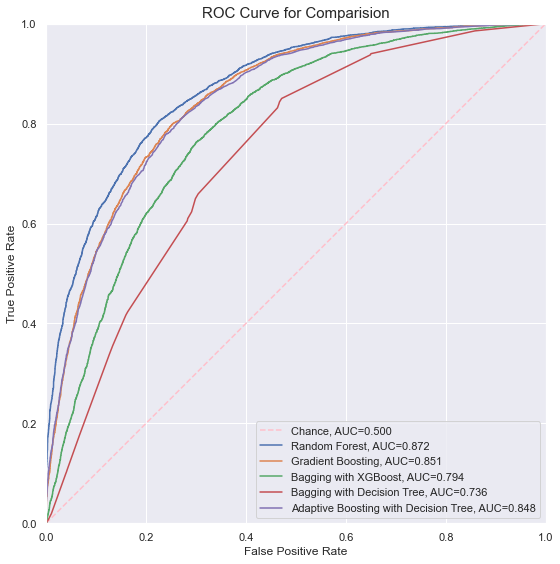

In [32]:
# prepare model
models = [model_rf, model_gb, model_bag, model_dt, model_ada]
labels = ['Random Forest', 'Gradient Boosting', 'Bagging with XGBoost', 'Bagging with Decision Tree',
          'Adaptive Boosting with Decision Tree']

# initialize plot
plt.figure(figsize=(16,8))

# plot the chance diagonal 
plt.plot((0,1),(0,1),color='pink', linestyle='--', label='Chance, AUC=0.500')

# plot ROC curve
for i, model in enumerate(models):
    scores = model.predict_proba(X_val)[:,1]
    fpr, tpr, _ = roc_curve(y_val, scores)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=labels[i] + ', AUC={:.3f}'.format(roc_auc))

# add elements to plot
plt.axis('square')
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Comparision', fontsize=15)
plt.legend()

# show plot
plt.tight_layout()
plt.show()

#### 4.3.3 Retrain Best Model 

Eventually, we found the best model to be `RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=90)`. Before evaluating its performance on test set, we retrained it on the entire training set (training + validation set) and recognized it as the final model.

In [33]:
# retrain best model on entire training set
best_model = model_rf.best_estimator_.fit(X_train, y_train)

## 5. Model Evaluation and Insights

### 5.1 Model Evaluation

#### 5.1.1 ROC Curve on Test Set

We evaluated performance of the final model on test set based on AUC of the ROC curve. From the ROC curve below, we found that the AUC is 0.840, which keeps almost the same value compared to AUC on validation set (method 1: 0.839 and method 2: 0.872), which indicates that almost no overfitting has occurred.

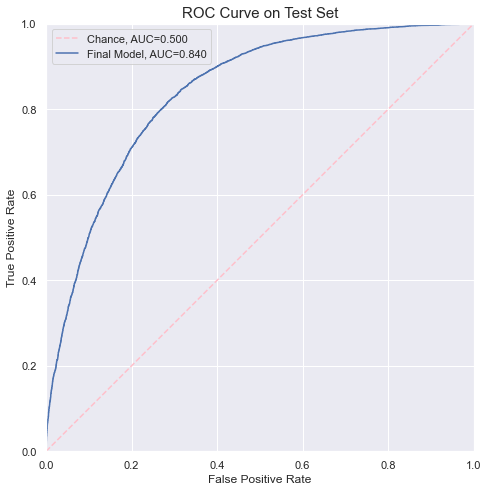

In [34]:
# initialize plot
plt.figure(figsize=(16,7))

# plot the chance diagonal 
plt.plot((0,1),(0,1),color='pink', linestyle='--', label='Chance, AUC=0.500')

# plot ROC curve
pre = best_model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, pre)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='Final Model, AUC={:.3f}'.format(roc_auc))
    
# add elements to plot
plt.axis('square')
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve on Test Set', fontsize=15)
plt.legend()

# show plot
plt.tight_layout()
plt.show()

#### 5.1.2 PR Curve on Test Set

We evaluated performance of the final model on test set based on AP (average precision) of the PR (precision-recall) curve. From the PR curve below, we found that the AP is 0.824, which is a lot higher than that of the chance line (0.497).

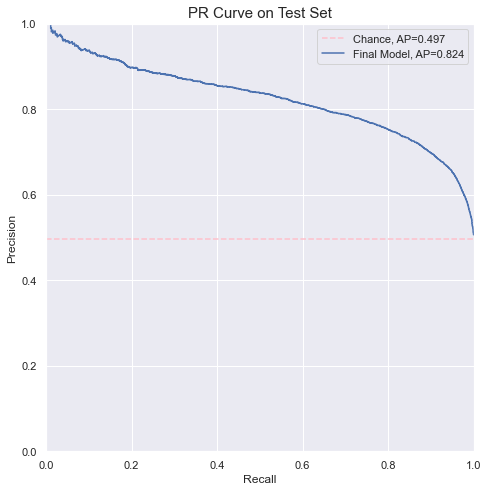

In [35]:
# initialize plot
plt.figure(figsize=(16,7))

# plot the chance line 
frac = len(np.where(y_train==1)[0])/(len(y_train))
plt.plot((0,1), (frac,frac), color='pink', linestyle='--', label='Chance, AP={:.3f}'.format(frac))

# plot PR curve
pre = best_model.predict_proba(X_test)[:,1]
precision, recall, _ = precision_recall_curve(y_test, pre)
ap = average_precision_score(y_test, pre)
plt.plot(recall, precision, label='Final Model, AP={:.3f}'.format(ap))
    
# add elements to plot
plt.axis('square')
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR Curve on Test Set', fontsize=15)
plt.legend()

# show plot
plt.tight_layout()
plt.show()

#### 5.1.3 Confusion Matrix on Test Set

We evaluated performance of the final model on test set based on the confusion matrix, as well as true positive rate, false positive rate, true negative rate, false negative rate and accuracy. From the outputs below, we found that all the values are sufficiently satisfying, with true positive rate (0.801), false positive rate (0.271), true negative rate (0.729), false negative rate (0.199) and accuracy (0.765).

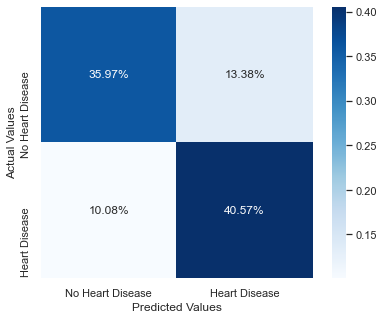

In [36]:
# create a confusion matrix on test set
y_pred = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(7,5))
ax = sns.heatmap(cm/np.sum(cm), fmt='.2%', annot=True, square=True, cmap='Blues')

ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values');
ax.xaxis.set_ticklabels(['No Heart Disease','Heart Disease'])
ax.yaxis.set_ticklabels(['No Heart Disease','Heart Disease'])

plt.show()

In [37]:
# Create a dataframe to show rates and accuracy
tp = cm[1][1]/cm.sum(axis=1)[1]
fp = cm[0][1]/cm.sum(axis=1)[0]
tn = cm[0][0]/cm.sum(axis=1)[0]
fn = cm[1][0]/cm.sum(axis=1)[1]
acc = (cm[0][0]+cm[1][1])/cm.sum()

data = [[tp],[fp],[tn],[fn],[acc]]
df_value = pd.DataFrame(data, columns=['Value'],
                       index=['True Positive Rate','False Positive Rate',
                              'True Negative Rate','False Negative Rate',
                              'Accuracy'])
df_value

,Value
True Positive Rate,0.801058
False Positive Rate,0.271067
True Negative Rate,0.728933
False Negative Rate,0.198942
Accuracy,0.765465


### 5.2 Insights

We performed feature importance analysis to figure out which features have higher tendency leading to heart disease based on the  final model. We selected top 10 important features to make further comparision and discussion.  

In [38]:
# create a feature importance analysis function
def calc_feature_importances(model, feat_names, num_to_show):
    # determine the relative importance of each feature 
    importances = model.feature_importances_
    
    # get an array of the indices that would sort "importances" in reverse order to get largest to smallest
    indices = np.argsort(importances)[::-1]
    ranked_feats = []
    for i in range(len(indices)):
        feat_name = feat_names[indices[i]]
        ranked_feats.append(feat_name)
    ranking = pd.DataFrame()
    ranking['Feat Index'] = indices
    ranking['Feature'] = ranked_feats
    ranking['Importance'] = np.sort(importances)[::-1]
    display(ranking.iloc[:num_to_show,:])

    # plot the importance value for each feature
    ax = ranking[:num_to_show][::-1].plot(x='Feature', y='Importance', kind='barh', figsize=(12,7), legend=False)
    plt.show()
       
    return ranking

,Feat Index,Feature,Importance
0,7,AgeCategory,0.337584
1,9,GenHealth,0.183947
2,6,DiffWalking,0.080354
3,3,Stroke,0.062970
4,4,PhysicalHealth,0.043851
5,22,Diabetic_No,0.038822
6,24,Diabetic_Yes,0.037829
7,0,BMI,0.031687
8,15,Sex_Male,0.028116
9,12,KidneyDisease,0.024590


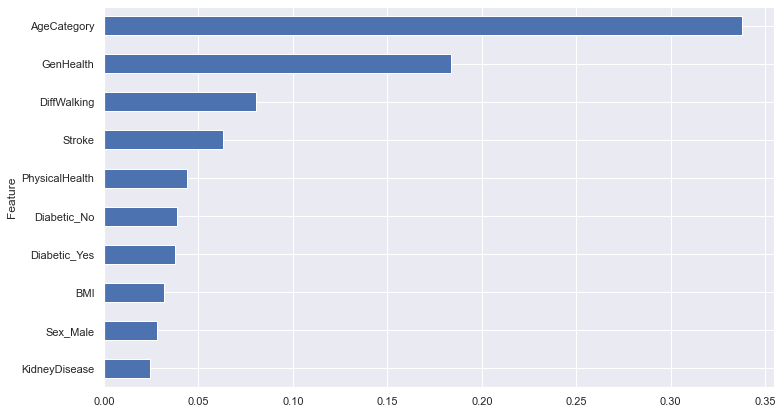

In [39]:
# find top 10 important features
top_features = 10
ranking = calc_feature_importances(best_model, X_train.columns, top_features)

The top 10 important features are: AgeCategory (0.338) > GenHealth (0.184) > DiffWalking (0.080) > Stroke (0.063) > PhysicalHealth (0.044) >  Diabetic_No (0.039) > Diabetic_Yes (0.038) > BMI (0.032) > Sex_Male (0.028) > Smoking (0.025). 

It is worth noticing that the top 5 important features are AgeCategory, GenHealth, DiffWalking, Stroke and PhysicalHealth. Aging problem ranks the first, which is in line with other medical evidence and common sense. In other words, the probability of having a heart disease increases the greatest when respondents get older. As for GenHealth, the probability of having a heart disease increases significantly if respondents rate themselves as unhealthier. Hence, self-evaluation of the respondent, which might often be neglected in the past, should be taken into consideration more seriously. Having severe difficulty walking or climbing stairs is also recognized as an essential feature, which indicates such behavior could be a strong precursor to heart disease. 

Stroke ranks the fourth and is more important compared with other diseases such as diabetes, asthma, kidney problems and skin cancer. One possible explaination is that stroke is also a kind of Cardiovascular Disease (CVD) just like heart disease, and there might be a higher probability in complications of CVD. PhysicalHealth ranks the fifth, hence the number of recent days that  respondents considered themselves as unhealthy should also be taken into serious consideration like GenHealth.

## 6. Discussions and Conclusions

To sum up, Gradient Boosting is chosen as the best among all of the classifiers, compared with other models which utilize Random Forest, Bagging, Decision Tree and Adaptive Boosting techniques. For evaluation on test set, it has a high AUC of 0.840 and AP of 0.824.

The drawback of the project is that the false negative rate (0.199) is not as low as what we expected. Relatively inaccurate results like this may give patients a false sense of security, leading them to become lax about dieting and exercising. To deal with this, some future work needs to be done. For example, the adjustments could be: 1. use oversampling instead of undersampling to get more datapoints, which might benefit model training, tuning, evaluating and predicting. 2. perform analysis first to narrow down the number of variables (e.g. PCA), and select more proper features with heart disease to optimize the models.

For the insights, aging problem, self-evaluation, difficulty walking or climbing stairs, stroke and recent days assessment are found to be the top 5 important features for heart disease. This finding could educate doctors, nurses, researchers and potential patients to focus more on these factors and take precautions in advance.

## 7. References

https://www.cdc.gov/heartdisease/maps_data.htm  
https://www.kaggle.com/code/nmtrang/dealing-with-imbalanced-data